In [9]:
import decode_eeg
import numpy as np
from pathlib import Path

np.random.seed(42)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 640x480 with 0 Axes>

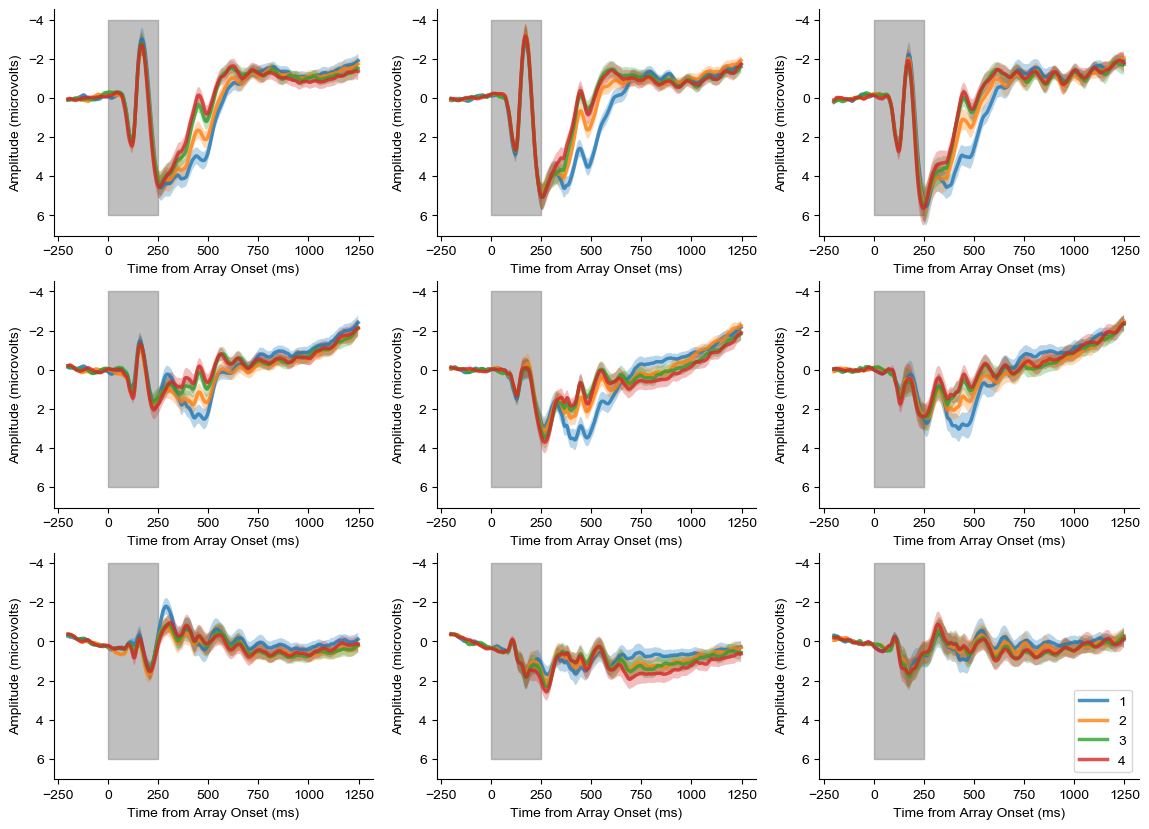

In [55]:
plt.clf()

experiment_names = ['1801','1901','1902']
fig,axes = plt.subplots(3,3,figsize=(14,10),sharex=True,sharey=True)

for iexp, experiment_name in enumerate(experiment_names):

    data_dir = f'./data/{experiment_name}'
    exp = decode_eeg.Experiment(experiment_name,data_dir,test=False)
    erp = decode_eeg.ERP(exp,subtitle=experiment_name)
    xdata_all, ydata_all = erp.load_all_eeg()

    for isubset,(subtitle,subset) in enumerate(zip(['_ssPO','_ssC','_ssF'],[('P','O'),('C'),('F')])):
        erp.plot_ss(xdata_all, ydata_all,ax = axes[isubset,iexp], electrode_subset=subset)
axes[iexp,isubset].legend(loc='lower right')

plt.savefig('output/figures/erps.png',dpi=500,bbox_inches='tight')
plt.savefig('output/figures/erps.pdf',dpi=500,bbox_inches='tight')
plt.show()

# Attended feature

In [23]:
experiment_names = ['1801','1901','1902']
xdata_all = np.empty((len(experiment_names)),dtype='object')
ydata_all = np.empty((len(experiment_names)),dtype='object')
for i,experiment_name in enumerate(experiment_names):
    data_dir = f'./data/{experiment_name}'
    exp = decode_eeg.Experiment(experiment_name,data_dir,test=False)
    erp = decode_eeg.ERP(exp,subtitle=experiment_name)
    xdata_all[i],ydata_all[i] = erp.load_all_eeg()

    for subtitle,subset in zip(['_ssPO_','_ssC_','_ssF_'],[('P','O'),('C'),('F')]):
        erp.plot_ss(xdata_all[i],ydata_all[i],subtitle=subtitle,electrode_subset=subset,savefig=False)

Saving output\figures\190220200414_110115.pdf


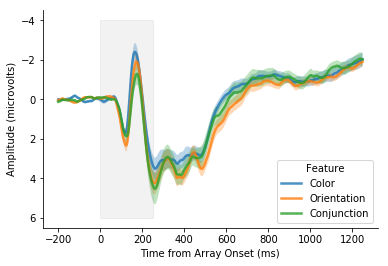

In [25]:
erp.plot_feat(xdata_all,ydata_all,savefig=True)